In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
results_folder = 'mmvec_major_taxa_1'
results_base_name = 'latent_dim_3_input_prior_1.00_output_prior_1.00_beta1_0.90_beta2_0.95'

In [3]:
table = pd.read_table(results_folder + '/' + results_base_name + '_ranks.txt', index_col=0)
table.head()

Propionibacteriaceae  Staphylococcus caprae or capitis  \
featureid                                                           
X940001                0.135536                          0.061269   
X940002               -0.007746                         -0.194599   
X940005               -0.069363                         -0.284181   
X940007                0.365357                          0.282299   
X940010                0.335508                          0.006827   

           Staphylococcus epidermidis  Staphylococcus hominis  \
featureid                                                       
X940001                      0.043672                0.044610   
X940002                     -0.286544               -0.040674   
X940005                     -0.334273               -0.414055   
X940007                      0.251389                0.551716   
X940010                      0.755825                0.447261   

           Other Staphylococci  Polyomavirus HPyV6  Polyomavirus HPyV7  \
featureid                                                                
X940001               0.184495            0.037716           -0.020562   
X940002              -0.171444           -0.101813           -0.153303   
X940005              -0.135930            0.357771           -0.014280   
X940007               0.228546            0.003074            0.195018   
X940010               0.298167            0.484671            0.768211   

           Merkel Cell Polyomavirus  Malasseziaceae  Corynebacteriaceae  \
featureid                                                                 
X940001                    0.100228        0.186801            0.315386   
X940002                   -0.118492       -0.160680           -0.099536   
X940005                   -0.047856       -0.396604           -0.174711   
X940007                    0.249597        0.381006            0.334098   
X940010                    0.686417       -0.164282            0.371776   

           Micrococcaceae  Other families  
featureid                                  
X940001          0.153056        0.079198  
X940002         -0.164102       -0.228855  
X940005         -0.159746       -0.241668  
X940007          0.264940        0.242767  
X940010          0.572235        0.496835

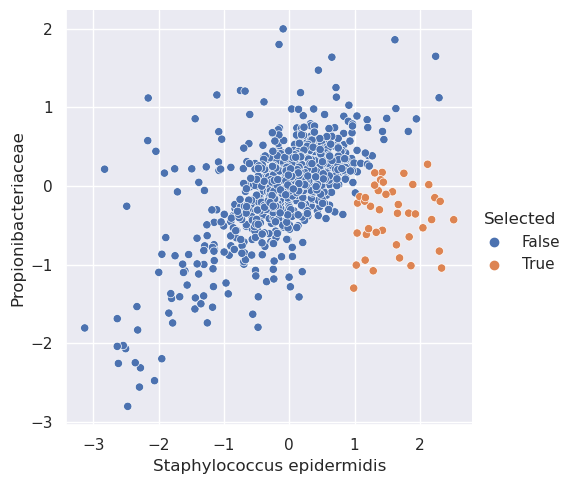

In [4]:
#table['Selected'] = np.logical_and(np.logical_and(table['Propionibacteriaceae']<0.4, table['Staphylococcus epidermidis']>0.9), table['Propionibacteriaceae'] - table['Staphylococcus epidermidis']<-1)
table['Selected'] = np.isin(table.index,
                            ['X940203', 'X940589', 'X940625', 'X940925', 'X940936', 'X942191',
                             'X942237', 'X950023', 'X950028', 'X950056', 'X950157', 'X950173',
                             'X950193', 'X950225', 'X950228', 'X950233', 'X950254', 'X950396',
                             'X950485', 'X950584', 'X950661', 'X950999', 'X960035', 'X960242',
                             'X960306', 'X960421', 'X960463', 'X960465', 'X960712', 'X960726',
                             'X960934', 'X961553', 'X961686', 'X970018', 'X970091', 'X970092',
                             'X970232', 'X970283', 'X970327', 'X970342', 'X970633', 'X970680']
                           )
table.sort_values('Selected', inplace=True)
sns.relplot(
    table,
    y='Propionibacteriaceae', x='Staphylococcus epidermidis', hue='Selected'
)

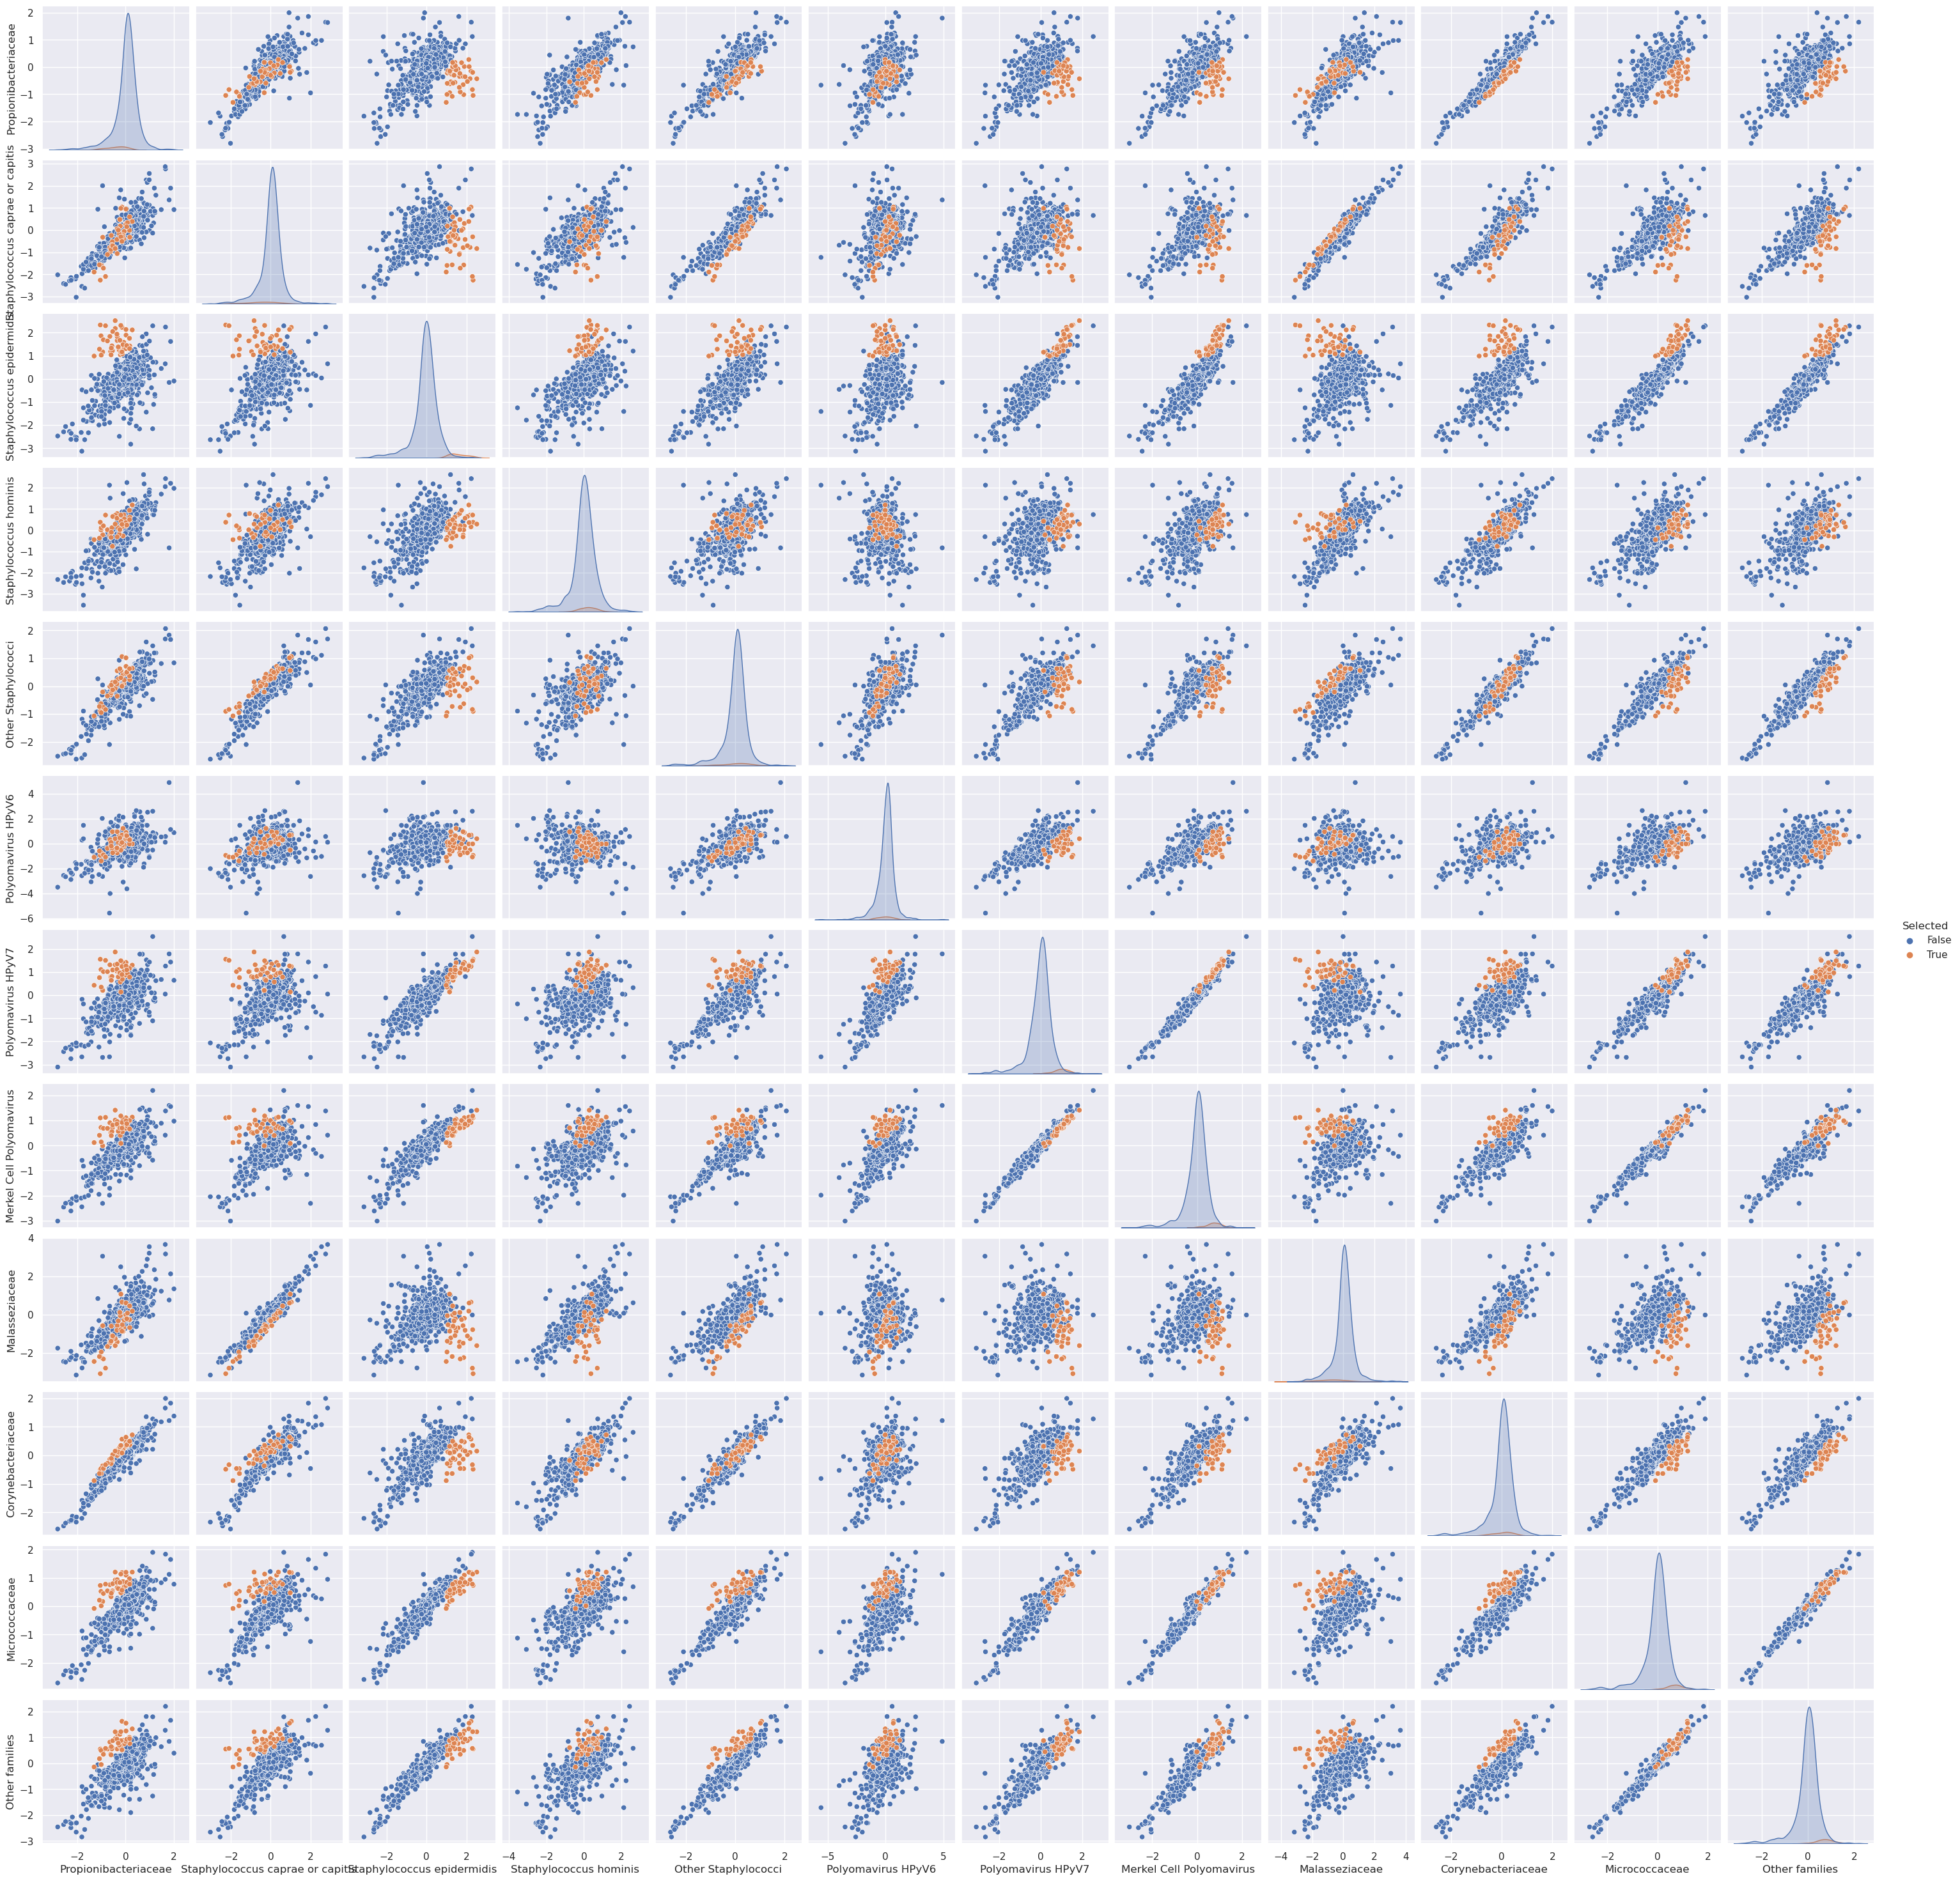

In [5]:
sns.pairplot(table, hue='Selected')

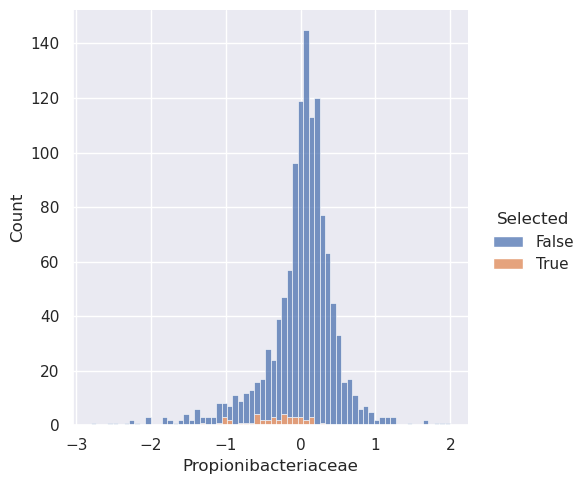

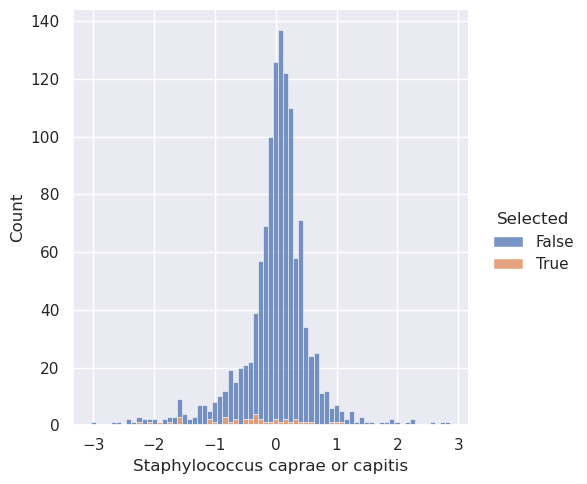

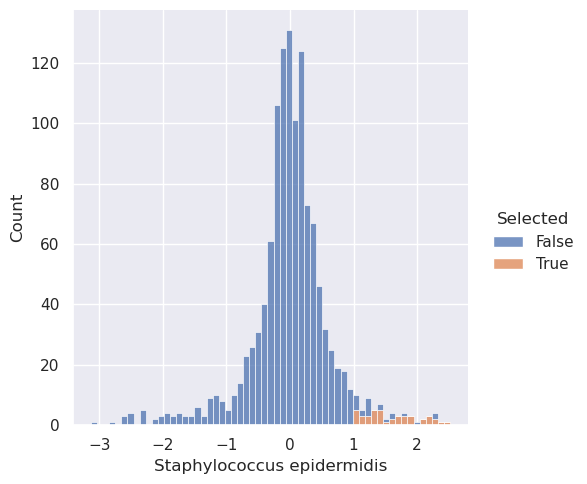

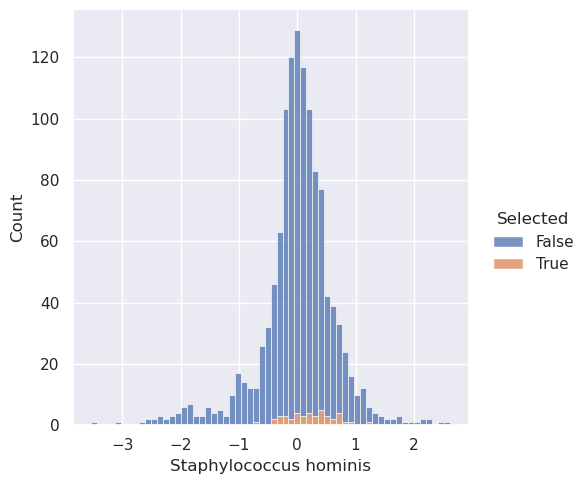

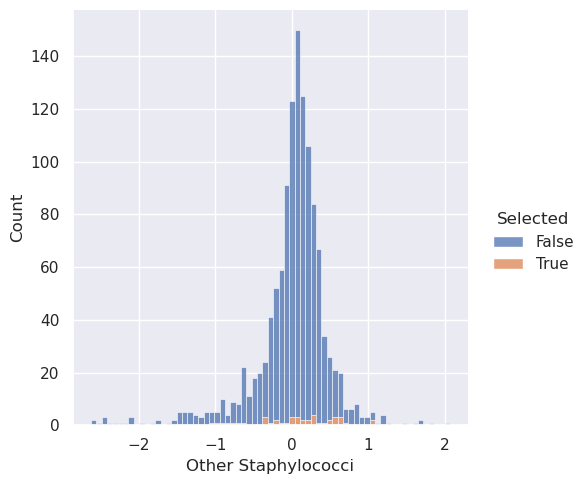

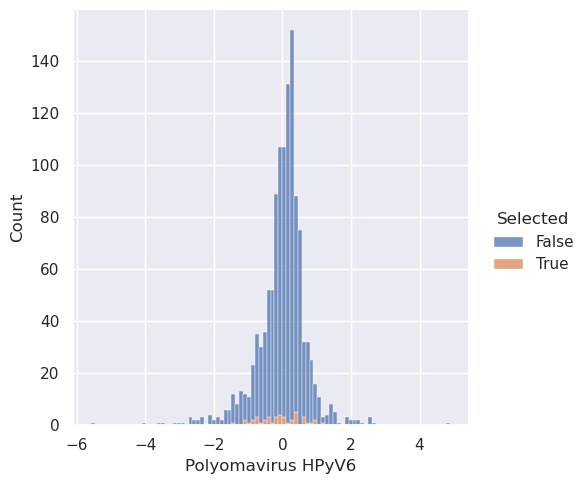

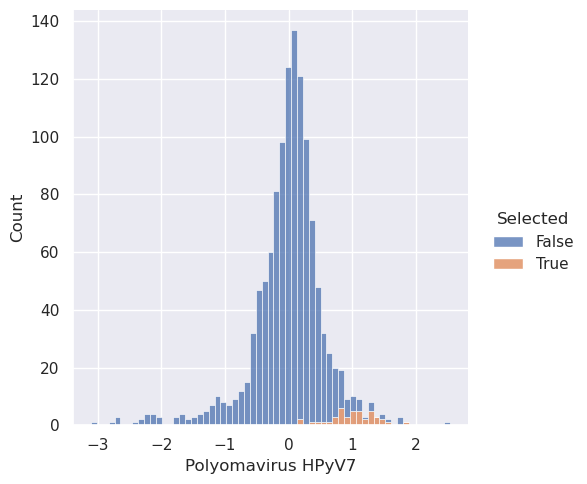

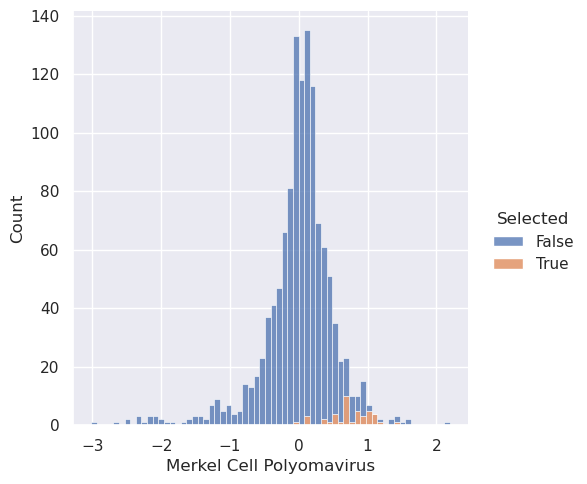

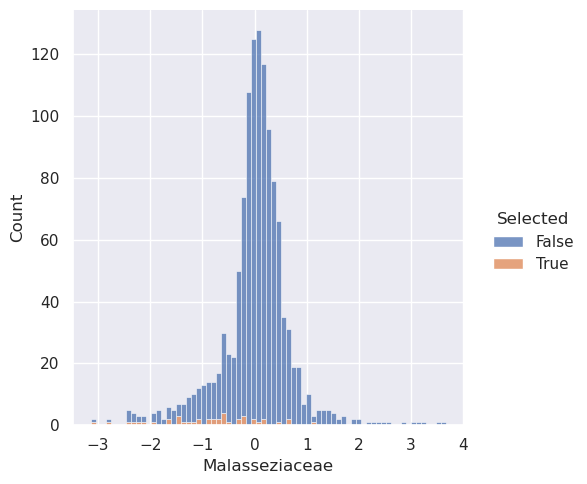

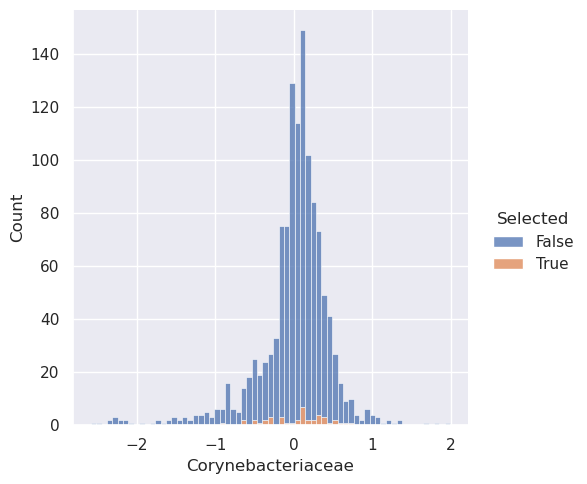

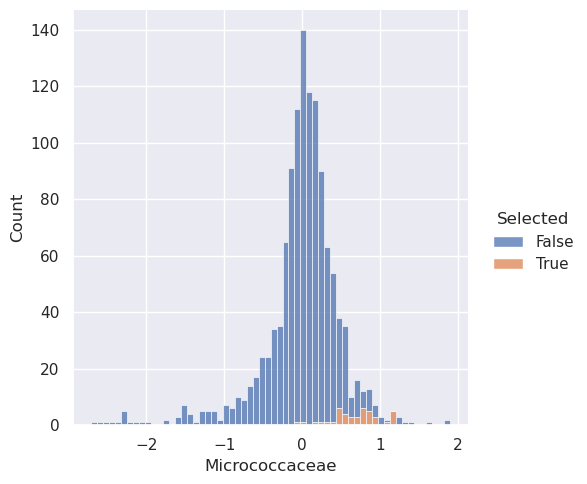

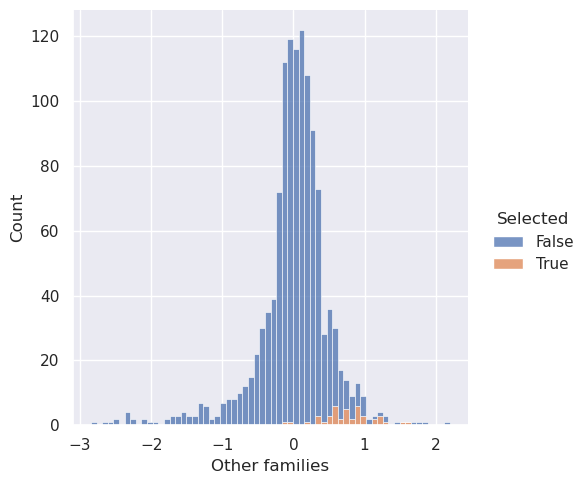

In [6]:
for i in table.columns[:-1]:
    sns.displot(table, x=i, hue='Selected', multiple='stack')